# Практика

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import laplace
import math
import statsmodels.stats.weightstats as ssw
%matplotlib inline

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [5]:
# ваш код тут
# например вот такое распределение https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cosine.html#scipy.stats.cosine
# A Laplace continuous random variable.
laplace_rv = sts.laplace()
sample = laplace_rv.rvs(100)
sample

array([ 0.60471711,  2.04387939,  0.22735399,  0.35472369, -0.03950636,
        1.05379924, -0.2134559 , -0.19794139, -1.96835915,  4.98310973,
       -1.55125174,  0.77730396,  0.11954973,  0.7530537 ,  0.79738329,
        0.22508006, -0.11725848, -0.42845593, -0.4687578 ,  2.70549132,
        1.29060539, -4.52554663, -0.38933668, -0.38796768,  0.34209401,
        3.6675318 , -0.90312661,  0.84009934, -0.28709299,  1.02505293,
        2.18246495,  0.02154829, -0.21564716, -1.71910673,  2.01328987,
        0.21170316, -0.09560597,  1.6655277 ,  0.22972341, -0.7752004 ,
       -0.34695185,  1.18187729, -1.4987417 , -0.19258925, -0.10135724,
        0.30657972,  0.8564542 ,  0.22681102, -0.31375842, -0.9686125 ,
       -3.76433685, -1.24123154,  0.1733216 ,  0.16647553, -0.69737703,
        1.16597235, -1.27799152, -2.12567296,  1.13446599, -1.24479707,
        1.15131036,  1.11173294,  0.76221078,  0.16412815,  0.1820668 ,
        0.01814537, -0.61949523,  0.96746435,  0.03824309,  0.13

In [6]:
sample.dtype

dtype('float64')

In [7]:
real_mean = laplace_rv.mean() # настоящее среднее случайной величины

In [8]:
real_var = laplace_rv.var() # настоящая дисперсия случайной величины

### Постройте гистограмму выборки и теоретическую плотность распределения

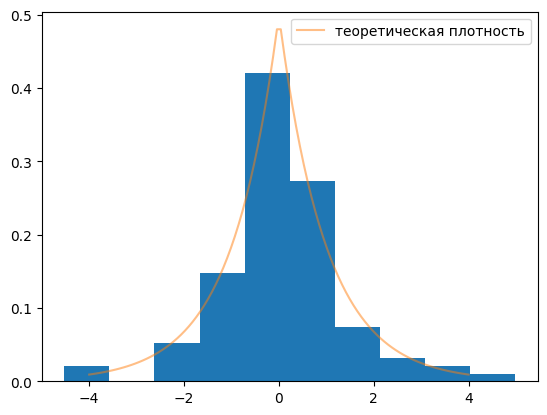

In [9]:
# ваш код тут
plt.hist(sample, density=True)
x = np.linspace(-4,4,100)
pdf = laplace_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

In [10]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

0.09978588735022824
1.7998052181494637


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

In [11]:
# Среднее и стандартное отклонение
mu = 0 
sigma = 3

sample = laplace_rv.rvs(100)
n_samples = 1000  # Количество выборок

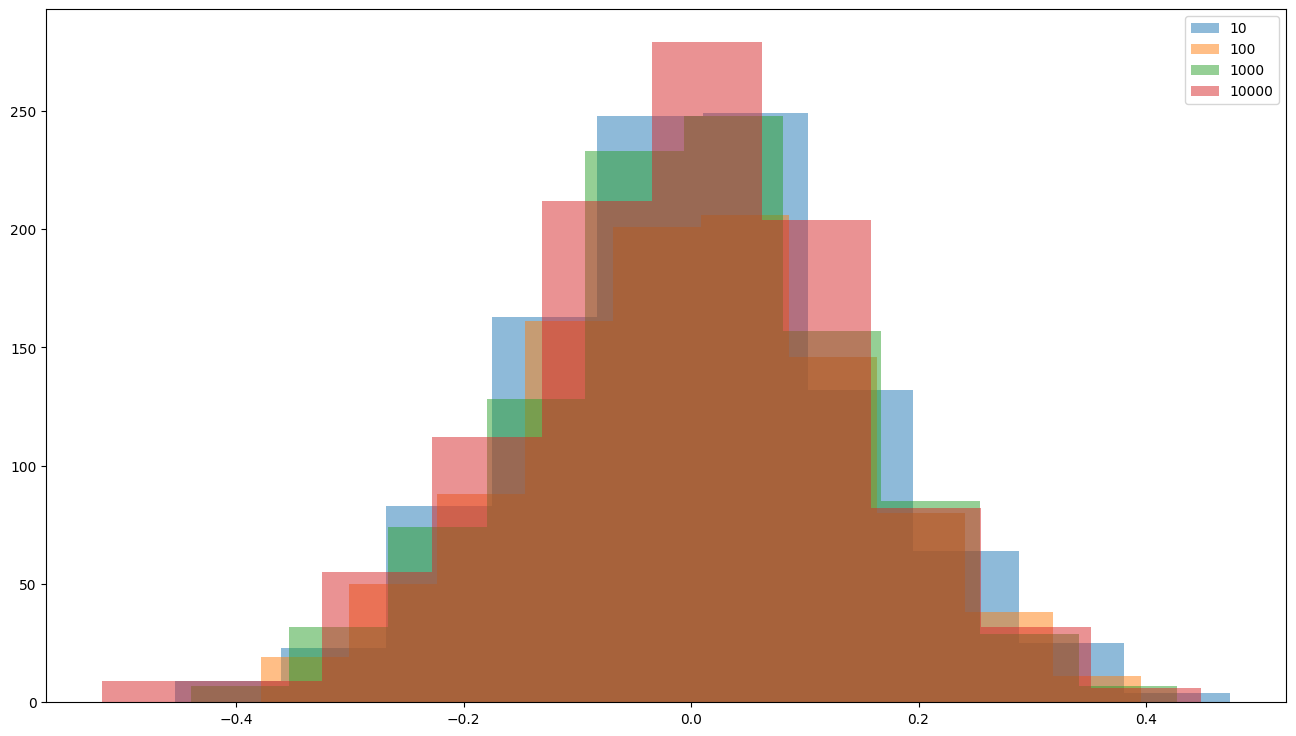

In [12]:
plt.figure(figsize=(16,9))
# сгенерируем много выборочных средних
for n_samples in [10, 100, 1000, 10000]:
    means = []
    for i in range(1000):
        means.append(np.mean(laplace_rv.rvs(100)))
    plt.hist(means, alpha=0.5)

plt.legend(['10', '100', '1000', '10000'])
plt.show()

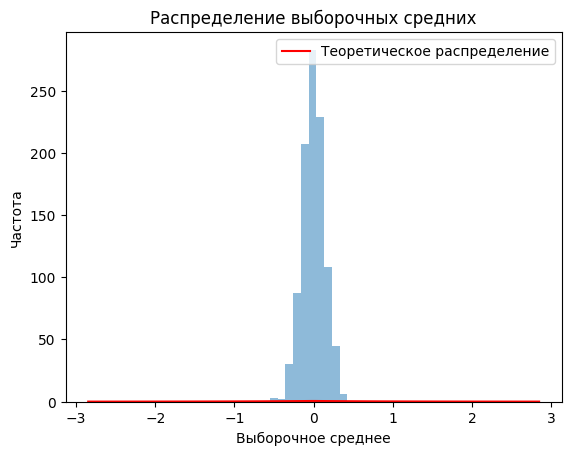

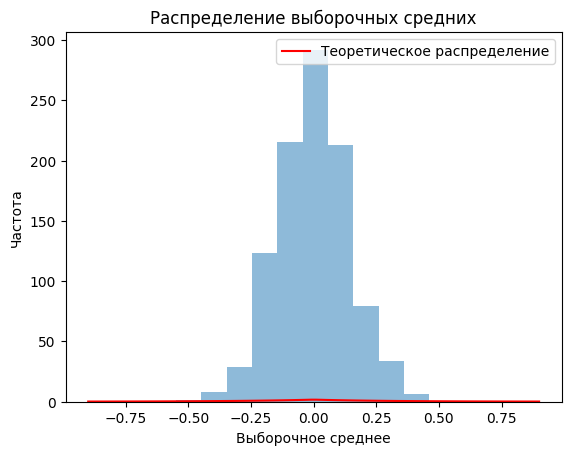

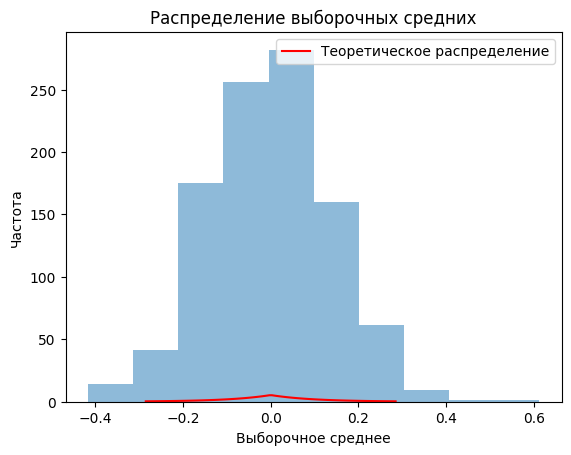

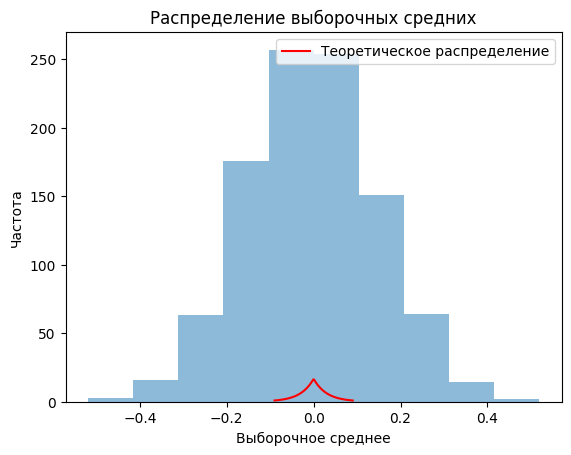

In [14]:
for n_samples in [10, 100, 1000, 10000]:
    means = []
    for i in range(1000):
        means.append(np.mean(laplace_rv.rvs(100)))
    plt.hist(means, alpha=0.5)

    # Теоретическое распределение выборочных средних по ЦПТ
    x = np.linspace(mu - 3*sigma/np.sqrt(n_samples), mu + 3*sigma/np.sqrt(n_samples), 100)
    y = laplace.pdf(x, loc=mu, scale=sigma/np.sqrt(n_samples))
    plt.plot(x, y, 'r-', label='Теоретическое распределение')
    plt.xlabel('Выборочное среднее')
    plt.ylabel('Частота')

    plt.title('Распределение выборочных средних')
    plt.legend()
    plt.show()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

<i>Вроде работает хотошо, единственно не могу понять почему график Теоретического распределения намного меньше, относительно Реальных.</i>

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [15]:
# либо загружаем из альтернативного хранилища
url ="https://raw.githubusercontent.com/piton1/DS/Lesson_5/telecom_churn.csv"
df=pd.read_csv(url)
display(df)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [16]:
df_True = df[df['churn'] == True]
df_False = df[df['churn'] == False]


In [17]:
df_True = df_True[['total day calls']]
df_False = df_False[['total day calls']]


In [18]:
cnt_df_True = df_True.count()
cnt_df_False = df_False.count()
print(f'{cnt_df_True}\n{cnt_df_False}')

total day calls    483
dtype: int64
total day calls    2850
dtype: int64


Z интервал:

In [19]:
def z_interval(x1, N): 
    return sts.norm.ppf(0.95, loc=np.mean(x1), scale=np.std(x1, ddof=1) / np.sqrt(N-1))

_zconfint_generic:

In [20]:
def sswz(x1, N):
    data = ssw._zconfint_generic(np.mean(x1)
                                ,  np.std(x1, ddof=1)//np.sqrt(N-1)
                                , alpha=0.95
                                , alternative='two-sided'
                                )
    return data

In [ ]:
true_zi = z_interval(df_True, cnt_df_True)
false_zi = z_interval(df_False, cnt_df_False)

true_zg = sswz(df_True, cnt_df_True)
false_zg = sswz(df_False, cnt_df_False)

In [23]:
print('Z интервал:')
print(f"Ушли(True):\n{true_zi}")
print(f"Остались(False):\n{false_zi}")

print('_zconfint_generic:')
print(f"Ушли(True):\n{true_zg}")
print(f"Остались(False):\n{false_zg}")

Z интервал:
Ушли(True):
[102.95237241]
Остались(False):
[100.89335704]
_zconfint_generic:
Ушли(True):
(total day calls    101.335404
dtype: float64, total day calls    101.335404
dtype: float64)
Остались(False):
(total day calls    100.283158
dtype: float64, total day calls    100.283158
dtype: float64)


<i>Вывод: Z интервал ушедших и оставшихся примерно одинаков с _zconfint_generic</i>